In [4]:
##################################Causal Inference Corona


import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel
import dowhy.datasets
import dowhy.api

In [5]:
##data import

df = pd.read_csv("C:/Users/bless/OneDrive/Documents/TrendingVirus/Final_Project_dataset_V5.csv",index_col=None)

In [6]:
df.head()

,Age,YO,Sex,Health care worker,Comorbidities,Exposure to camels,Camel milk consumption,Exposure to MERS-CoV cases,Day_diff,target
0,67,0,0,0,Yes,1,0,0,2.0,1
1,69,0,0,0,Yes,0,0,0,2.0,1
2,51,0,0,0,Yes,0,0,0,6.0,1
3,48,0,0,0,Yes,1,1,0,2.0,1
4,40,1,1,0,Yes,0,0,0,5.0,1


In [7]:
df.Sex = df.Sex==1.0
df.Age = df.Age<18

df.head()

,Age,YO,Sex,Health care worker,Comorbidities,Exposure to camels,Camel milk consumption,Exposure to MERS-CoV cases,Day_diff,target
0,False,0,False,0,Yes,1,0,0,2.0,1
1,False,0,False,0,Yes,0,0,0,2.0,1
2,False,0,False,0,Yes,0,0,0,6.0,1
3,False,0,False,0,Yes,1,1,0,2.0,1
4,False,1,True,0,Yes,0,0,0,5.0,1


In [8]:
df['Exposure to MERS-CoV cases'] = df['Exposure to MERS-CoV cases']==1.0

In [9]:
df.Day_diff = df.Day_diff<3

In [10]:
df.target = df.target==1.0

df.head()

,Age,YO,Sex,Health care worker,Comorbidities,Exposure to camels,Camel milk consumption,Exposure to MERS-CoV cases,Day_diff,target
0,False,0,False,0,Yes,1,0,False,True,True
1,False,0,False,0,Yes,0,0,False,True,True
2,False,0,False,0,Yes,0,0,False,False,True
3,False,0,False,0,Yes,1,1,False,True,True
4,False,1,True,0,Yes,0,0,False,False,True


In [11]:
# define treatment and target

df = df.causal.do(x='Age',
                  outcome='target',
                  common_causes=['Sex','Health care worker','Exposure to camels','Camel milk consumption','Exposure to MERS-CoV cases'
,'Day_diff'],
                  variable_types={'Sex':'b','Health care worker':'d','Exposure to camels':'d','Camel milk consumption':'d','Exposure to MERS-CoV cases':'d','Day_diff':'d','target':'b','Age':'b'})

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Age'] on outcome ['target']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['Health care worker', 'Day_diff', 'Camel milk consumption', 'Exposure to camels', 'U', 'Sex', 'Exposure to MERS-CoV cases']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.


INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Age'] on outcome ['target']
INFO:dowhy.causal_graph:Using Matplotlib for plotting


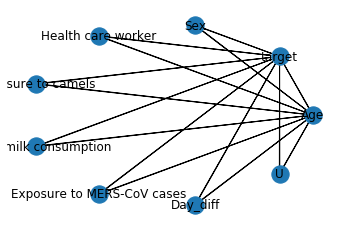

In [14]:
model= CausalModel(
        data=df,
        treatment='Age',
        outcome='target',
        common_causes=['Sex','Health care worker','Exposure to camels','Camel milk consumption','Exposure to MERS-CoV cases'
,'Day_diff'],
        variable_typesvariable_types={'Sex':'b','Health care worker':'d','Exposure to camels':'d','Camel milk consumption':'d','Exposure to MERS-CoV cases':'d','Day_diff':'d','target':'b','Age':'b'},instruments=[])
model.view_model(layout="dot")

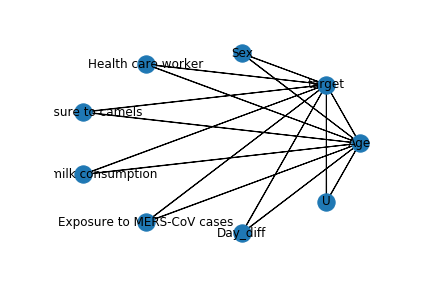

In [15]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [16]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['Health care worker', 'Day_diff', 'Camel milk consumption', 'Exposure to camels', 'U', 'Sex', 'Exposure to MERS-CoV cases']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                           
──────(Expectation(target|Health care worker,Day_diff,Camel milk consumption,E
d[Age]                                                                        

                                                  
xposure to camels,Sex,Exposure to MERS-CoV cases))
                                                  
Estimand assumption 1, Unconfoundedness: If U→{Age} and U→target then P(target|Age,Health care worker,Day_diff,Camel milk consumption,Exposure to camels,Sex,Exposure to MERS-CoV cases,U) = P(target|Age,Health care worker,Day_diff,Camel milk consumption,Exposure to camels,Sex,Exposure to MERS-CoV cases)
### Estimand : 2
Estimand name: iv
No such variable found!



In [18]:
identified_estimand

In [19]:
df = df.dropna()

In [20]:
causal_estimate = model.estimate_effect(identified_estimand,method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: target~Age+Health care worker+Day_diff+Camel milk consumption+Exposure to camels+Sex+Exposure to MERS-CoV cases


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                           
──────(Expectation(target|Health care worker,Day_diff,Camel milk consumption,E
d[Age]                                                                        

                                                  
xposure to camels,Sex,Exposure to MERS-CoV cases))
                                                  
Estimand assumption 1, Unconfoundedness: If U→{Age} and U→target then P(target|Age,Health care worker,Day_diff,Camel milk consumption,Exposure to camels,Sex,Exposure to MERS-CoV cases,U) = P(target|Age,Health care worker,Day_diff,Camel milk consumption,Exposure to camels,Sex,Exposure to MERS-CoV cases)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: target~Age+Health care worker+Day_diff+Camel milk consumption+Exposure to camels+S

C:\Users\bless\AppData\Local\Continuum\anaconda3\envs\mma_2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bless\AppData\Local\Continuum\anaconda3\envs\mma_2\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bless\AppData\Local\Continuum\anaconda3\envs\mma_2\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [21]:
model

In [22]:
# Causal effect on the control group (ATC)
causal_estimate_att = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification",
        target_units = "atc")
print(causal_estimate_att)
print("Causal Estimate is " + str(causal_estimate_att.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: target~Age+Health care worker+Day_diff+Camel milk consumption+Exposure to camels+Sex+Exposure to MERS-CoV cases


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                                                           
──────(Expectation(target|Health care worker,Day_diff,Camel milk consumption,E
d[Age]                                                                        

                                                  
xposure to camels,Sex,Exposure to MERS-CoV cases))
                                                  
Estimand assumption 1, Unconfoundedness: If U→{Age} and U→target then P(target|Age,Health care worker,Day_diff,Camel milk consumption,Exposure to camels,Sex,Exposure to MERS-CoV cases,U) = P(target|Age,Health care worker,Day_diff,Camel milk consumption,Exposure to camels,Sex,Exposure to MERS-CoV cases)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: target~Age+Health care worker+Day_diff+Camel milk consumption+Exposure to camels+S

C:\Users\bless\AppData\Local\Continuum\anaconda3\envs\mma_2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bless\AppData\Local\Continuum\anaconda3\envs\mma_2\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bless\AppData\Local\Continuum\anaconda3\envs\mma_2\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [23]:
##considering new treatment 

### Exposure to MERS-CoV cases considered

df = df.causal.do(x='Exposure to MERS-CoV cases',
                  outcome='target',
                  common_causes=['Sex','Health care worker','Exposure to camels','Camel milk consumption','Exposure to MERS-CoV cases'
,'Day_diff'],
                  variable_types={'Sex':'b','Health care worker':'d','Exposure to camels':'d','Camel milk consumption':'d','Exposure to MERS-CoV cases':'b','Day_diff':'d','target':'b','Age':'b'})

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Exposure to MERS-CoV cases'] on outcome ['target']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['Health care worker', 'Day_diff', 'Camel milk consumption', 'Exposure to camels', 'U', 'Sex']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.


INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Exposure to MERS-CoV cases'] on outcome ['target']
INFO:dowhy.causal_graph:Using Matplotlib for plotting
C:\Users\bless\AppData\Local\Continuum\anaconda3\envs\mma_2\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\bless\AppData\Local\Continuum\anaconda3\envs\mma_2\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


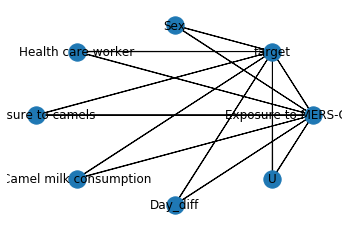

In [24]:
model= CausalModel(
        data=df,
        treatment='Exposure to MERS-CoV cases',
        outcome='target',
        common_causes=['Sex','Health care worker','Exposure to camels','Camel milk consumption','Exposure to MERS-CoV cases'
,'Day_diff'],
        variable_typesvariable_types={'Sex':'b','Health care worker':'d','Exposure to camels':'d','Camel milk consumption':'d','Exposure to MERS-CoV cases':'b','Day_diff':'d','target':'b','Age':'b'},instruments=[])
model.view_model(layout="dot")

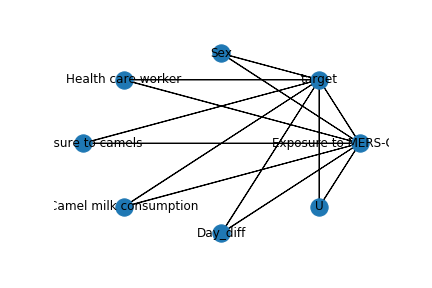

In [25]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [26]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['Health care worker', 'Day_diff', 'Camel milk consumption', 'Exposure to camels', 'U', 'Sex']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
              d                                                               
─────────────────────────────(Expectation(target|Health care worker,Day_diff,C
d[Exposure to MERS-CoV cases]                                                 

                                              
amel milk consumption,Exposure to camels,Sex))
                                              
Estimand assumption 1, Unconfoundedness: If U→{Exposure to MERS-CoV cases} and U→target then P(target|Exposure to MERS-CoV cases,Health care worker,Day_diff,Camel milk consumption,Exposure to camels,Sex,U) = P(target|Exposure to MERS-CoV cases,Health care worker,Day_diff,Camel milk consumption,Exposure to camels,Sex)
### Estimand : 2
Estimand name: iv
No such variable found!



In [27]:
identified_estimand

In [28]:
causal_estimate = model.estimate_effect(identified_estimand,method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: target~Exposure to MERS-CoV cases+Health care worker+Day_diff+Camel milk consumption+Exposure to camels+Sex


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
              d                                                               
─────────────────────────────(Expectation(target|Health care worker,Day_diff,C
d[Exposure to MERS-CoV cases]                                                 

                                              
amel milk consumption,Exposure to camels,Sex))
                                              
Estimand assumption 1, Unconfoundedness: If U→{Exposure to MERS-CoV cases} and U→target then P(target|Exposure to MERS-CoV cases,Health care worker,Day_diff,Camel milk consumption,Exposure to camels,Sex,U) = P(target|Exposure to MERS-CoV cases,Health care worker,Day_diff,Camel milk consumption,Exposure to camels,Sex)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: target~Exposure to MERS-CoV cases+Health care worker+Day_diff+Camel milk consum

C:\Users\bless\AppData\Local\Continuum\anaconda3\envs\mma_2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bless\AppData\Local\Continuum\anaconda3\envs\mma_2\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bless\AppData\Local\Continuum\anaconda3\envs\mma_2\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [29]:
# Causal effect on the control group (ATC)
causal_estimate_att = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification",
        target_units = "atc")
print(causal_estimate_att)
print("Causal Estimate is " + str(causal_estimate_att.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: target~Exposure to MERS-CoV cases+Health care worker+Day_diff+Camel milk consumption+Exposure to camels+Sex


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
              d                                                               
─────────────────────────────(Expectation(target|Health care worker,Day_diff,C
d[Exposure to MERS-CoV cases]                                                 

                                              
amel milk consumption,Exposure to camels,Sex))
                                              
Estimand assumption 1, Unconfoundedness: If U→{Exposure to MERS-CoV cases} and U→target then P(target|Exposure to MERS-CoV cases,Health care worker,Day_diff,Camel milk consumption,Exposure to camels,Sex,U) = P(target|Exposure to MERS-CoV cases,Health care worker,Day_diff,Camel milk consumption,Exposure to camels,Sex)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: target~Exposure to MERS-CoV cases+Health care worker+Day_diff+Camel milk consum

C:\Users\bless\AppData\Local\Continuum\anaconda3\envs\mma_2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bless\AppData\Local\Continuum\anaconda3\envs\mma_2\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bless\AppData\Local\Continuum\anaconda3\envs\mma_2\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [30]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: target~Exposure to MERS-CoV cases+Health care worker+Day_diff+Camel milk consumption+Exposure to camels+Sex


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
              d                                                               
─────────────────────────────(Expectation(target|Health care worker,Day_diff,C
d[Exposure to MERS-CoV cases]                                                 

                                              
amel milk consumption,Exposure to camels,Sex))
                                              
Estimand assumption 1, Unconfoundedness: If U→{Exposure to MERS-CoV cases} and U→target then P(target|Exposure to MERS-CoV cases,Health care worker,Day_diff,Camel milk consumption,Exposure to camels,Sex,U) = P(target|Exposure to MERS-CoV cases,Health care worker,Day_diff,Camel milk consumption,Exposure to camels,Sex)
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: target~Exposure to MERS-CoV cases+Health care worker+Day_diff+Camel milk consum